<img src="./image/image1.png" alt="bank" style="width: 100%; height: 100%; object-fit: cover; border-radius: 20px;">

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

# <a id='menu'></a> 🎵 Музыка больших городов: Москва vs Санкт-Петербург 🏙️

## 🎭 Миф и реальность

Сравнение Москвы и Петербурга окружено мифами:

* 🏢 **Москва** — мегаполис, подчинённый жёсткому ритму рабочей недели
* 🎨 **Петербург** — культурная столица, со своими уникальными вкусами

На данных Яндекс.Музыки мы проведем детальное сравнение поведения пользователей двух столиц.

## 🎯 Цель исследования

Проверить три ключевые гипотезы:

1. [📅 Активность пользователей зависит от дня недели, с различными паттернами в Москве и Петербурге.](#hyp-1)
2. [🕰️ Жанровые предпочтения различаются в зависимости от времени и города:](#hyp-2)
   - [В понедельник утром в Москве и Петербурге преобладают разные жанры](#monday)
   - [Вечером пятницы также наблюдаются различия в жанровых предпочтениях](#friday)
3. [🎶 Общие музыкальные вкусы городов различаются:](#hyp-3)
   - Москва отдает предпочтение поп-музыке
   - Петербург больше склоняется к русскому рэпу

## 🔍 Ход исследования

Наше исследование будет основано на данных из файла `yandex_music_project.csv`. Учитывая неизвестное качество данных, мы проведем исследование в три этапа:

### [1️⃣ Обзор данных](#first)
- Анализ структуры и содержания датасета
- Выявление потенциальных проблем и ошибок

### [2️⃣ Предобработка данных](#second)
- Очистка и подготовка данных для анализа
- Исправление критических ошибок и несоответствий

### [3️⃣ Проверка гипотез](#third)
- Применение статистических методов для проверки каждой гипотезы
- Интерпретация результатов и формулирование выводов

## 🚀 Ожидаемые результаты

По итогам исследования мы планируем получить глубокое понимание музыкальных предпочтений и поведенческих паттернов пользователей Яндекс.Музыки в Москве и Санкт-Петербурге. Это не только поможет развеять или подтвердить существующие мифы, но и предоставит ценную информацию для дальнейшего развития сервиса и таргетированных маркетинговых стратегий.

---

Готовы погрузиться в мир музыкальных предпочтений двух столиц? Поехали! 🎶🚂

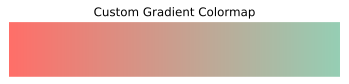

In [2]:
# Ignore Warnings
import warnings

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning
from fuzzywuzzy import fuzz
from itertools import combinations

# Stat Test
from scipy.stats import chi2_contingency


# Gradient Genrator
from matplotlib.colors import LinearSegmentedColormap

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')  # Disabling warning outputs

# Определение цветовых кодов в формате HEX
colors = ['#ff6f69', '#96ceb4']

# Преобразование цветовых кодов в формат RGB
colors_rgb = [tuple(int(color[i:i+2], 16) / 255.0 for i in (1, 3, 5)) for color in colors]

# Создание цветовой карты LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom_gradient', colors_rgb)

# Создание градиента от 0 до 1
gradient = np.linspace(0, 1, 256).reshape(1, -1)

# Отображение градиента с использованием созданной цветовой карты
plt.figure(figsize=(6, 1))
plt.imshow(gradient, aspect='auto', cmap=cmap)
plt.axis('off')
plt.title('Custom Gradient Colormap')
plt.show()

## <a id='first'></a> 1️⃣ Обзор данных


[**Главное меню**](#menu)

In [3]:
# Прописываем путь к файлу `data.csv`
DATAPATH = './data/yandex_music_project.csv'

# Read the training data into a pandas DataFrame
df = pd.read_csv(DATAPATH)

In [4]:
# Отображаем первые 5 наблюдений
df.head()

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday


In [5]:
# Выводим список названий столбцов DataFrame
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

In [6]:
# Преобразуем названия столбцов в нижний регистр и удаляем пробелы в начале и конце
df.columns = df.columns.str.lower().str.strip()

In [7]:
# Выводим первые 5 строк DataFrame
df.head()

,userid,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday


In [8]:
# Выводим статистическое описание столбцов DataFrame
df.describe()

,userid,track,artist,genre,city,time,day
count,65079,63848,57876,63881,65079,65079,65079
unique,41748,47245,43605,289,2,20392,3
top,A8AE9169,Intro,Sasha,pop,Moscow,08:14:07,Friday
freq,76,34,6,8850,45360,14,23149


In [9]:
# Выводим общую информацию о DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  65079 non-null  object
 1   track   63848 non-null  object
 2   artist  57876 non-null  object
 3   genre   63881 non-null  object
 4   city    65079 non-null  object
 5   time    65079 non-null  object
 6   day     65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


In [10]:
# Подсчитываем количество пропущенных значений в каждом столбце DataFrame
df.isna().sum()

userid       0
track     1231
artist    7203
genre     1198
city         0
time         0
day          0
dtype: int64

In [11]:
# Выводим типы данных каждого столбца DataFrame
df.dtypes

userid    object
track     object
artist    object
genre     object
city      object
time      object
day       object
dtype: object

## <a id='second'></a> 2️⃣ Предобработка данных


[**Главное меню**](#menu)

In [12]:
# Находим столбцы с пропущенными значениями
missing_cols = df.columns[df.isna().sum() > 0].tolist()

# Заполняем пропущенные значения в этих столбцах значением 'unknown'
for col in missing_cols:
    df[col].fillna('unknown', inplace=True)

# Проверяем, что все пропущенные значения заполнены
df.isna().sum()

userid    0
track     0
artist    0
genre     0
city      0
time      0
day       0
dtype: int64

In [13]:
# Подсчитываем количество дублирующихся строк в DataFrame
df.duplicated().sum()


3826

In [14]:
# Удаляем дублирующиеся строки и сбрасываем индекс
df = df.drop_duplicates().reset_index(drop=True)

### Выявим аномалии и несоответствия в данных


In [15]:
# Функция для поиска похожих жанров
def find_similar_genres(genres, threshold=60):
    similar_pairs = []
    for genre1, genre2 in combinations(genres, 2):
        # Вычисляем схожесть строк
        similarity = fuzz.ratio(genre1.lower(), genre2.lower())
        if similarity >= threshold:
            similar_pairs.append((genre1, genre2, similarity))
    # Сортируем пары по убыванию схожести
    return sorted(similar_pairs, key=lambda x: x[2], reverse=True)

# Получаем уникальные жанры и сортируем их
genres = sorted(df['genre'].unique())

# Находим похожие жанры
similar_genres = find_similar_genres(genres)

# Выводим результаты
for genre1, genre2, similarity in similar_genres:
    print(f"'{genre1}' и '{genre2}' похожи на {similarity}%")

'hip-hop' и 'hiphop' похожи на 92%
'latin' и 'latino' похожи на 91%
'electronic' и 'popelectronic' похожи на 87%
'chanson' и 'shanson' похожи на 86%
'classical' и 'classicmetal' похожи на 86%
'eastern' и 'western' похожи на 86%
'jpop' и 'pop' похожи на 86%
'alternative' и 'alternativepunk' похожи на 85%
'alternative' и 'rockalternative' похожи на 85%
'metal' и 'numetal' похожи на 83%
'poprussian' и 'russian' похожи на 82%
'cuban' и 'urban' похожи на 80%
'hardcore' и 'posthardcore' похожи на 80%
'jazz' и 'nujazz' похожи на 80%
'local' и 'vocal' похожи на 80%
'popdance' и 'popeurodance' похожи на 80%
'reggae' и 'reggaeton' похожи на 80%
'tech' и 'techno' похожи на 80%
'türk' и 'türkçe' похожи на 80%
'christian' и 'christmas' похожи на 78%
'animated' и 'anime' похожи на 77%
'conjazz' и 'nujazz' похожи на 77%
'dance' и 'dancepop' похожи на 77%
'dance' и 'popdance' похожи на 77%
'electronic' и 'loungeelectronic' похожи на 77%
'entehno' и 'techno' похожи на 77%
'hiphop' и 'triphop' похожи на

In [16]:
# Объединяем похожие жанры
# Заменяем различные вариации 'hip-hop' на 'hiphop'
df.loc[df['genre'].isin(['hip-hop', 'hiphop', 'hip', 'hop']), 'genre'] = 'hiphop'

# Объединяем 'latin' и 'latino' в 'latin'
df.loc[df['genre'].isin(['latin', 'latino']), 'genre'] = 'latin'

# Объединяем 'chanson' и 'shanson' в 'chanson'
df.loc[df['genre'].isin(['chanson', 'shanson']), 'genre'] = 'chanson'

## <a id='third'></a> 3️⃣ Проверка гипотез


[**Главное меню**](#menu)

#### <a id='hyp-1'></a>1. Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. 

Проверим это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. 


Для этого:

- Разделим пользователей Москвы и Санкт-Петербурга
- Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.
- Выполним каждый из расчётов по отдельности.

Оценим активность пользователей в каждом городе. Сгруппируем данные по городу и посчитаем прослушивания в каждой группе.

#### Разделим пользователей Москвы и Санкт-Петербурга

In [17]:
# Подсчитываем количество записей для каждого города и выводим результат
city_counts = df.groupby('city').size().sort_values(ascending=False)

print("Город | Количество посещений")
print("-" * 30)
for city, count in city_counts.items():
    print(f"{city:<11} | {count:>8}")

Город | Количество посещений
------------------------------
Moscow      |    42741
Saint-Petersburg |    18512


#### Исследуем общее количество посещений по дням недели

In [18]:
# Подсчитываем количество записей для каждого дня недели и выводим результат
day_counts = df.groupby('day').size().sort_values(ascending=False)

print("День недели | Количество посещений")
print("-" * 30)
for day, count in day_counts.items():
    print(f"{day:<11} | {count:>8}")

День недели | Количество посещений
------------------------------
Friday      |    21840
Monday      |    21354
Wednesday   |    18059


#### Визуализируем количество посещений по дням недели

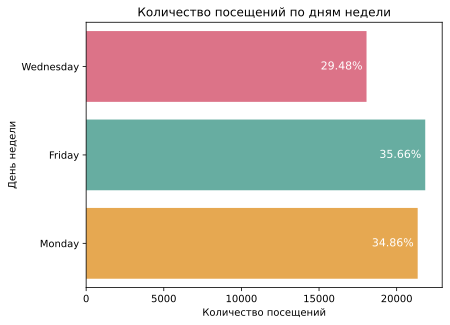

In [19]:

# Создаем столбчатую диаграмму посещений по дням недели
ax = sns.countplot(data=df, y='day', palette=['#ed627e', '#5bb9a9', '#ffac38'])

# Вычисляем общее количество записей
total = float(len(df))

# Добавляем подписи с процентами к каждому столбцу
for p in ax.patches:
        percentage = p.get_width()
        if percentage > 0:
            percentage_label = '{:.2f}%'.format((percentage / total) * 100)
            y = p.get_y() + p.get_height() / 2 
            x = p.get_width() 
            ax.annotate(percentage_label, (x, y), textcoords="offset points", xytext=(-25, -3), ha='center', fontsize = 11, color='white')

# Настраиваем заголовок и подписи осей
plt.title('Количество посещений по дням недели')
plt.ylabel('День недели')
plt.xlabel('Количество посещений')

# Отображаем график
plt.show()



#### Сравним, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.

In [20]:
# Подсчитываем количество записей для каждого дня недели 
city_day_counts = df.groupby(['city', 'day']).size()

# Выводим результат
print(city_day_counts)

city              day      
Moscow            Friday       15945
                  Monday       15740
                  Wednesday    11056
Saint-Petersburg  Friday        5895
                  Monday        5614
                  Wednesday     7003
dtype: int64


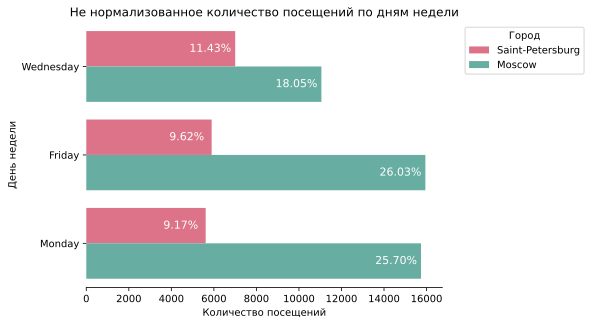

In [21]:
# Создаем столбчатую диаграмму посещений по дням недели с разбивкой по городам
ax = sns.countplot(data=df, y='day', hue='city', palette=['#ed627e', '#5bb9a9'])

# Вычисляем общее количество записей
total = float(len(df))

# Добавляем подписи с процентами к каждому столбцу
for p in ax.patches:
        percentage = p.get_width()
        if percentage > 0:
            percentage_label = '{:.2f}%'.format((percentage / total) * 100)
            y = p.get_y() + p.get_height() / 2 
            x = p.get_width() 
            ax.annotate(percentage_label, (x, y), textcoords="offset points", xytext=(-25, -3), ha='center', fontsize = 11, color='white')

# Настраиваем заголовок и подписи осей
plt.title('Не нормализованное количество посещений по дням недели')
plt.ylabel('День недели')
plt.xlabel('Количество посещений')

# Перемещаем легенду за пределы графика
plt.legend(title='Город', bbox_to_anchor=(1.05, 1), loc='upper left')

# Удаление рамки вокруг графика
sns.despine(left=True)

# Отображаем график
plt.show()

Важно отметить, что каждое число представляет собой фактическое количество посещений,
а не долю или процент от общего числа посещений.

Это позволяет напрямую сравнивать объемы трафика между городами и днями недели,
но не дает информации о пропорциональном распределении посещений.

**Целесообразно представить данные в виде процентного соотношения от общего количества посещений для каждого города. Такой подход позволит провести сравнительный анализ распределения посещений по дням недели между различными городами.**

In [22]:
# Подсчет общего количества пользователей в каждом городе
total_city_count = df.groupby(['city'])['userid'].count()

# Вычисление процентного соотношения пользователей по городам и дням
cities = (df.groupby(['city', 'day'])['userid'].count() / total_city_count * 100)\
    .reset_index()\
        .rename(columns={'userid': 'percentage'})


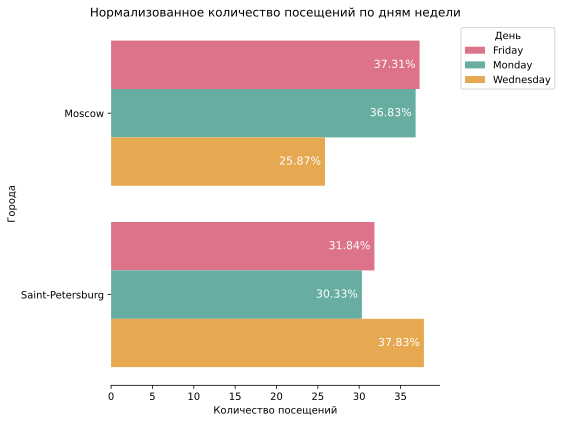

In [23]:
# Увеличиваем размер фигуры, чтобы легенда поместилась рядом
plt.figure(figsize=(8, 6))

# Создаем график
ax = sns.barplot(data=cities, y='city', x='percentage', hue='day', palette=['#ed627e', '#5bb9a9', '#ffac38'])

# Настройка заголовка и меток осей
plt.title('Нормализованное количество посещений по дням недели')
plt.ylabel('Города')
plt.xlabel('Количество посещений')

for p in ax.patches:
        percentage = p.get_width()
        if percentage > 0:
            percentage_label = '{:.2f}%'.format(percentage)
            y = p.get_y() + p.get_height() / 2 
            x = p.get_width() 
            ax.annotate(percentage_label, (x, y), textcoords="offset points", xytext=(-25, -3), ha='center', fontsize = 11, color='white')

# Перемещаем легенду за пределы графика
plt.legend(title='День', bbox_to_anchor=(1.05, 1), loc='upper left')

# Удаление рамки вокруг графика
sns.despine(left=True)


# Настраиваем макет, чтобы легенда не перекрывала график
plt.tight_layout()
plt.show()

In [24]:
cities_data = df.groupby(['city', 'day'])['userid'].count()
cities_data

city              day      
Moscow            Friday       15945
                  Monday       15740
                  Wednesday    11056
Saint-Petersburg  Friday        5895
                  Monday        5614
                  Wednesday     7003
Name: userid, dtype: int64

Гипотезы:
H0 (нулевая гипотеза): Нет значимой связи между городом и днем недели в паттернах прослушивания музыки.
H1 (альтернативная гипотеза): Существует значимая связь между городом и днем недели в паттернах прослушивания музыки.

Chi-squared statistic: 891.5613014297979
p-value: 2.5114425921309295e-194


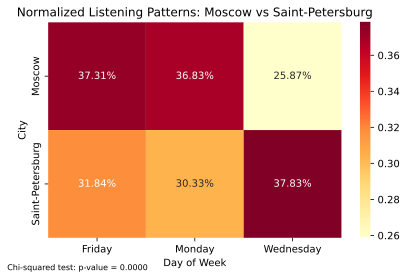

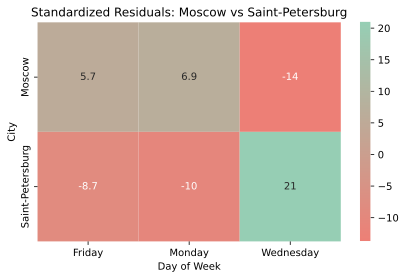


Вывод:
p-значение (2.5114e-194) меньше уровня значимости (0.05).
Мы отвергаем нулевую гипотезу (H0) и принимаем альтернативную гипотезу (H1).
Вывод: Существует статистически значимая связь между городом и днем недели в паттернах прослушивания музыки.

Интерпретация:
Чрезвычайно низкое p-значение указывает на то, что наблюдаемые различия в паттернах
прослушивания между Москвой и Санкт-Петербургом крайне маловероятно объяснить случайностью.
Это свидетельствует о существенных различиях в поведении слушателей в этих городах в зависимости от дня недели.


In [25]:
# Формулировка гипотез
print("Гипотезы:")
print("H0 (нулевая гипотеза): Нет значимой связи между городом и днем недели в паттернах прослушивания музыки.")
print("H1 (альтернативная гипотеза): Существует значимая связь между городом и днем недели в паттернах прослушивания музыки.")

# Преобразование Series в DataFrame
cities_df = cities_data.reset_index()
cities_df.columns = ['City', 'Day', 'Count']

# Создаем контингенционную таблицу
contingency_table = pd.pivot_table(cities_df, values='Count', index='City', columns='Day')

# Проведение хи-квадрат теста
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared statistic: {chi2}")
print(f"p-value: {p_value}")

# Визуализация результатов
plt.figure(figsize=(6, 4))

# Нормализация данных для сравнения
normalized_data = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Построение графика
ax = sns.heatmap(normalized_data, annot=True, cmap='YlOrRd', fmt='.2%')
plt.title('Normalized Listening Patterns: Moscow vs Saint-Petersburg')
plt.ylabel('City')
plt.xlabel('Day of Week')

# Добавление информации о статистическом тесте
plt.text(0.1, -0.15, f'Chi-squared test: p-value = {p_value:.4f}', 
         horizontalalignment='center', transform=ax.transAxes, fontsize=8)

plt.tight_layout()
plt.show()

# Дополнительный анализ: стандартизированные остатки
observed = contingency_table.values
expected = chi2_contingency(observed)[3]
residuals = (observed - expected) / np.sqrt(expected)

plt.figure(figsize=(6, 4))
sns.heatmap(pd.DataFrame(residuals, index=contingency_table.index, columns=contingency_table.columns),
            annot=True, cmap=cmap, center=0)
plt.title('Standardized Residuals: Moscow vs Saint-Petersburg')
plt.ylabel('City')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()

# Вывод и принятие гипотезы
alpha = 0.05  # уровень значимости
print("\nВывод:")
if p_value < alpha:
    print(f"p-значение ({p_value:.4e}) меньше уровня значимости ({alpha}).")
    print("Мы отвергаем нулевую гипотезу (H0) и принимаем альтернативную гипотезу (H1).")
    print("Вывод: Существует статистически значимая связь между городом и днем недели в паттернах прослушивания музыки.")
else:
    print(f"p-значение ({p_value:.4f}) больше или равно уровню значимости ({alpha}).")
    print("Мы не можем отвергнуть нулевую гипотезу (H0).")
    print("Вывод: Нет достаточных доказательств для утверждения о значимой связи между городом и днем недели в паттернах прослушивания музыки.")

print("\nИнтерпретация:")
print("Чрезвычайно низкое p-значение указывает на то, что наблюдаемые различия в паттернах")
print("прослушивания между Москвой и Санкт-Петербургом крайне маловероятно объяснить случайностью.")
print("Это свидетельствует о существенных различиях в поведении слушателей в этих городах в зависимости от дня недели.")



### Анализ паттернов прослушивания музыки: Москва и Санкт-Петербург

#### Гипотеза:
Существуют значимые различия в паттернах прослушивания музыки между пользователями в Москве и Санкт-Петербурге.

#### Методология
Проанализированы данные о прослушиваниях за три дня недели (понедельник, среда, пятница) в обоих городах. Данные представлены в процентном соотношении от общего числа прослушиваний за эти дни.

#### Результаты

#### Распределение прослушиваний (%)

| Город           | Понедельник | Среда  | Пятница |
|-----------------|-------------|--------|---------|
| Москва          | 36.83       | 25.87  | 37.31   |
| Санкт-Петербург | 30.33       | 37.83  | 31.84   |

#### Ключевые наблюдения

1. **Межгородские различия**:
   - Наибольшая разница наблюдается в среду (11.96 процентных пунктов).
   - В понедельник разница составляет 6.5 процентных пунктов.
   - В пятницу разница минимальна - 5.47 процентных пунктов.

2. **Внутригородские тенденции**:
   - **Москва**: Бимодальное распределение с пиками в понедельник и пятницу.
   - **Санкт-Петербург**: Унимодальное распределение с пиком в среду.

3. **Дневная динамика**:
   - В Москве наблюдается спад активности в середине недели.
   - В Санкт-Петербурге, напротив, середина недели характеризуется пиком прослушиваний.

#### Результаты хи-квадрат теста

1. Статистика хи-квадрат (Chi-squared statistic): 891.56
   Это очень большое значение, что указывает на существенные различия между наблюдаемыми и ожидаемыми частотами.

2. p-значение (p-value): 2.51e-194
   Это чрезвычайно малое значение, намного меньше стандартного уровня значимости 0.05 или даже 0.001.

Интерпретация:

1. Статистическая значимость:
   p-значение настолько мало (практически равно нулю), что мы можем с очень высокой уверенностью отвергнуть нулевую гипотезу. Это означает, что различия в паттернах прослушивания между Москвой и Санкт-Петербургом статистически значимы.

2. Сила связи:
   Большое значение статистики хи-квадрат указывает на сильную связь между городом и днем недели в отношении паттернов прослушивания.

3. Практическая значимость:
   Хотя статистическая значимость очевидна, важно также оценить практическую значимость этих различий. Для этого полезно обратиться к визуализациям и процентным соотношениям, которые вы получили ранее.

Выводы:

1. Существует статистически значимая разница в паттернах прослушивания музыки между Москвой и Санкт-Петербургом в зависимости от дня недели.

2. Эта разница настолько существенна, что вероятность того, что она возникла случайно, практически равна нулю.

3. Результаты подтверждают изначальную гипотезу о значимых различиях в паттернах прослушивания между двумя городами.


#### Общие выводы

1. Данные свидетельствуют о существенных различиях в паттернах прослушивания музыки между Москвой и Санкт-Петербургом.

2. Москва демонстрирует более высокую активность в начале и конце рабочей недели, что может быть связано с:
   - Стремлением "разогреться" в начале недели
   - Подготовкой к выходным в конце недели

3. Санкт-Петербург показывает пик активности в середине недели, что может указывать на:
   - Различия в рабочей культуре
   - Особенности городского ритма жизни

4. Необходимы дальнейшие исследования для выявления причин наблюдаемых различий, включая:
   - Анализ жанровых предпочтений
   - Учет демографических факторов
   - Исследование влияния локальных культурных событий


### <a id='hyp-2'></a> 2. Вторая гипотеза утверждает, что жанровые предпочтения различаются в зависимости от времени и города:
   - В понедельник утром в Москве и Петербурге преобладают разные жанры
   - Вечером пятницы также наблюдаются различия в жанровых предпочтениях

 Для этого:

- Извлекаем час из столбца 'time' и создаем новый столбец 'hour'
- Созданим новый столбец 'time_of_the_day' на основе значений столбца 'hour'
- Сгруппируем данные по городу, дню недели и времени суток, с подсчетом количества каждого музыкального жанра
- Вычисленим процентное соотношение жанров по городам, дням недели и времени суток

Оценим предпочтения пользователей в каждом городе в разные дни недели в разные часы. 

In [26]:
# Извлекаем час из столбца 'time' и создаем новый столбец 'hour'
df['hour'] = pd.to_datetime(df['time']).dt.hour

In [27]:
# Подсчет общего количества пользователей в каждом городе
total_city_count = df.groupby(['city'])['userid'].count()

# Вычисление процентного соотношения пользователей по городам и часам
hours_by_cities = (df.groupby(['city', 'hour'])['userid'].count() / total_city_count * 100).reset_index().rename(columns={'userid': 'percentage'})

# Вывод результата
hours_by_cities

,city,hour,percentage
0,Moscow,8,16.078239
1,Moscow,9,15.914462
2,Moscow,10,0.297139
3,Moscow,13,16.681875
4,Moscow,14,17.095997
5,Moscow,15,0.297139
6,Moscow,20,17.622423
7,Moscow,21,15.746005
8,Moscow,22,0.266723
9,Saint-Petersburg,8,14.261020


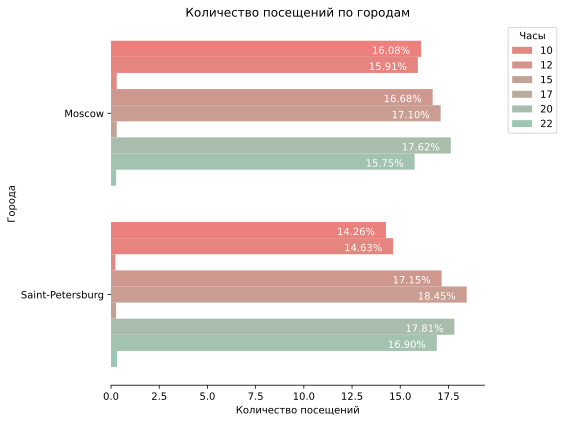

In [28]:
# Увеличиваем размер фигуры, чтобы легенда поместилась рядом
plt.figure(figsize=(8, 6))

# Создаем график
ax = sns.barplot(data=hours_by_cities, y='city', x='percentage', hue='hour', palette=cmap, dodge=True)

# Настройка заголовка и меток осей
plt.title('Количество посещений по городам')
plt.ylabel('Города')
plt.xlabel('Количество посещений')

for p in ax.patches:
        percentage = p.get_width()
        if percentage > 0:
            percentage_label = '{:.2f}%'.format(percentage)
            y = p.get_y() + p.get_height() / 2 
            x = p.get_width() 
            ax.annotate(percentage_label, (x, y), textcoords="offset points", xytext=(-30, -5), ha='center', fontsize = 10, color='white')

# Перемещаем легенду за пределы графика
plt.legend(title='Часы', bbox_to_anchor=(1.05, 1), loc='upper left')

# Удаление рамки вокруг графика
sns.despine(left=True)


# Настраиваем макет, чтобы легенда не перекрывала график
plt.tight_layout()
plt.show()

### <a id='monday'></a>Исследуем данные утра понедельника

In [29]:
# Создание нового столбца 'time_of_the_day' на основе значений столбца 'hour'
df['time_of_the_day'] = df['hour'].apply(lambda x: 'morning' if x <= 11 else 'afternoon' if x <= 17 else 'evening')

In [30]:
# Группировка данных по городу, дню недели и времени суток, с подсчетом количества каждого музыкального жанра
music_by_day = df.groupby(['city', 'day', 'time_of_the_day'], as_index=False)['genre'].value_counts().reset_index(drop=True)

# Вывод результата
music_by_day

,city,day,time_of_the_day,genre,count
0,Moscow,Friday,afternoon,pop,664
1,Moscow,Friday,afternoon,dance,522
2,Moscow,Friday,afternoon,rock,471
3,Moscow,Friday,afternoon,electronic,442
4,Moscow,Friday,afternoon,hiphop,264
...,...,...,...,...,...
2430,Saint-Petersburg,Wednesday,morning,thrash,1
2431,Saint-Petersburg,Wednesday,morning,trance,1
2432,Saint-Petersburg,Wednesday,morning,ukrrock,1
2433,Saint-Petersburg,Wednesday,morning,western,1


In [31]:
# Вычисление процентного соотношения жанров по городам, дням недели и времени суток
genre_percentage = df.groupby(['city', 'day', 'time_of_the_day', 'genre']).agg(total = ('genre', 'count')) \
    / df.groupby(['city', 'day', 'time_of_the_day', 'genre']).agg(total = ('genre', 'count')).groupby(['city', 'day', 'time_of_the_day']).sum()

# Сброс индекса для получения обычного DataFrame
genre_percentage = genre_percentage.reset_index()

genre_percentage

,city,day,time_of_the_day,genre,total
0,Moscow,Friday,afternoon,africa,0.000582
1,Moscow,Friday,afternoon,alternative,0.036642
2,Moscow,Friday,afternoon,ambient,0.004847
3,Moscow,Friday,afternoon,americana,0.000194
4,Moscow,Friday,afternoon,animated,0.000194
...,...,...,...,...,...
2430,Saint-Petersburg,Wednesday,morning,videogame,0.001942
2431,Saint-Petersburg,Wednesday,morning,vocal,0.000971
2432,Saint-Petersburg,Wednesday,morning,western,0.000485
2433,Saint-Petersburg,Wednesday,morning,world,0.023301


In [32]:
def sorter(city, day, time_of_the_day, head=None):
    # Фильтрация данных по городу, дню недели и времени суток
    filtered_data = genre_percentage[
        (genre_percentage['city'] == city) & 
        (genre_percentage['day'] == day) & 
        (genre_percentage['time_of_the_day'] == time_of_the_day)
    ][['city', 'genre', 'total']]
    
    # Сортировка по столбцу 'total' в убывающем порядке
    sorted_data = filtered_data.sort_values(by='total', ascending=False).reset_index(drop=True)
    
    # Если параметр head задан, возвращаем только первые head строк
    if head is not None:
        return sorted_data.head(head)
    else:
        return sorted_data

# Вызов функции для Санкт-Петербурга, пятницы, дневного времени, с ограничением в 12 строк
sorter('Saint-Petersburg', 'Monday', 'morning', 12)
# sorter('Moscow', 'Monday', 'morning', 12)

,city,genre,total
0,Saint-Petersburg,pop,0.135826
1,Saint-Petersburg,dance,0.113396
2,Saint-Petersburg,rock,0.100935
3,Saint-Petersburg,electronic,0.091589
4,Saint-Petersburg,hiphop,0.049844
5,Saint-Petersburg,ruspop,0.039875
6,Saint-Petersburg,alternative,0.036137
7,Saint-Petersburg,rusrap,0.034268
8,Saint-Petersburg,jazz,0.027414
9,Saint-Petersburg,classical,0.024922


In [33]:
# Предположим, что у вас есть функция sorter, которая возвращает датафрейм
df1 = sorter('Saint-Petersburg', 'Monday', 'morning', 12)
df2 = sorter('Moscow', 'Monday', 'morning', 12)

# Объединяем датафреймы горизонтально
result = pd.concat([df1, df2], axis=1)

# Выводим результат
print(result)

                city        genre     total    city        genre     total
0   Saint-Petersburg          pop  0.135826  Moscow          pop  0.148536
1   Saint-Petersburg        dance  0.113396  Moscow        dance  0.104412
2   Saint-Petersburg         rock  0.100935  Moscow   electronic  0.091289
3   Saint-Petersburg   electronic  0.091589  Moscow         rock  0.090148
4   Saint-Petersburg       hiphop  0.049844  Moscow       hiphop  0.054393
5   Saint-Petersburg       ruspop  0.039875  Moscow       ruspop  0.035375
6   Saint-Petersburg  alternative  0.036137  Moscow        world  0.034424
7   Saint-Petersburg       rusrap  0.034268  Moscow       rusrap  0.033283
8   Saint-Petersburg         jazz  0.027414  Moscow  alternative  0.031191
9   Saint-Petersburg    classical  0.024922  Moscow      unknown  0.030620
10  Saint-Petersburg        world  0.022430  Moscow    classical  0.029859
11  Saint-Petersburg          rap  0.019938  Moscow        metal  0.022822


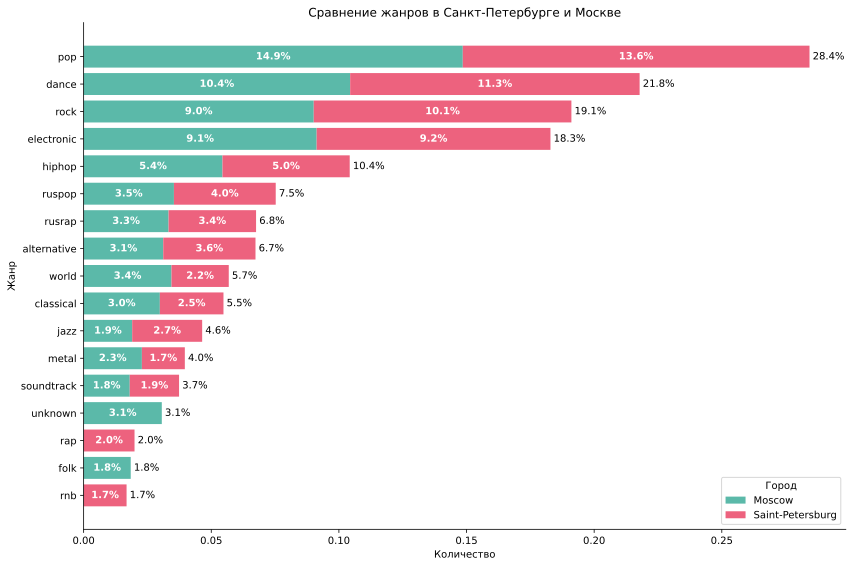

In [34]:

# Подготовка данных (предполагается, что функция sorter уже определена)
data_spb = sorter('Saint-Petersburg', 'Monday', 'morning', 15)
data_msk = sorter('Moscow', 'Monday', 'morning', 15)

# Объединяем данные
data_spb['city'] = 'Saint-Petersburg'
data_msk['city'] = 'Moscow'
combined_data = pd.concat([data_spb, data_msk])

# Вычисляем общую сумму для каждого жанра и сортируем
genre_totals = combined_data.groupby('genre')['total'].sum().sort_values(ascending=True)

# Создаем сводную таблицу
pivot_data = combined_data.pivot(index='genre', columns='city', values='total').fillna(0)
pivot_data = pivot_data.reindex(genre_totals.index)

# Создаем график
fig, ax = plt.subplots(figsize=(12, max(8, len(pivot_data) * 0.4)))

# Рисуем столбцы для каждого города
left = pd.Series(0, index=pivot_data.index)
colors = {'Saint-Petersburg': '#ed627e', 'Moscow': '#5bb9a9'}
for city in pivot_data.columns:
    ax.barh(pivot_data.index, pivot_data[city], left=left, label=city, color=colors[city])
    
    # Добавляем подписи с процентами внутри столбцов
    for i, value in enumerate(pivot_data[city]):
        if value > 0:
            ax.text(left[i] + value/2, i, f'{value*100:.1f}%', 
                    ha='center', va='center', color='white', fontweight='bold')
    
    left += pivot_data[city]

# Добавляем общий процент справа от столбцов
for i, genre in enumerate(pivot_data.index):
    total = pivot_data.loc[genre].sum()
    ax.text(total, i, f' {total*100:.1f}%', ha='left', va='center')

# Настройка графика
plt.title('Cравнение жанров в Санкт-Петербурге и Москве')
plt.xlabel('Количество')
plt.ylabel('Жанр')
plt.legend(title='Город')

# Удаление рамки вокруг графика
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [35]:

df1 = sorter('Saint-Petersburg', 'Monday', 'morning', 12)
df2 = sorter('Moscow', 'Monday', 'morning', 12)

# Определение гипотез
null_hypothesis = "Распределение музыкальных жанров одинаково в Москве и Санкт-Петербурге в понедельник утром"
alternative_hypothesis = "Распределение музыкальных жанров различается между Москвой и Санкт-Петербургом в понедельник утром"

# Функция для проведения анализа
def analyze_genre_preferences(df1, df2, alpha=0.05):
    print("Анализ жанровых предпочтений в Москве и Санкт-Петербурге")
    print("=" * 70)
    print(f"Нулевая гипотеза (H0): {null_hypothesis}")
    print(f"Альтернативная гипотеза (H1): {alternative_hypothesis}")
    print("=" * 70)

    # 1. Подготовка данных
    df = pd.concat([df1, df2])
    pivot_table = df.pivot(index='city', columns='genre', values='total').fillna(0)

    # 2. Проведение теста хи-квадрат
    chi2, p_value, dof, expected = chi2_contingency(pivot_table)

    print("\nРезультаты теста хи-квадрат:")
    print(f"Статистика хи-квадрат: {chi2:.4f}")
    print(f"Степени свободы: {dof}")
    print(f"p-значение: {p_value:.4f}")

    # 3. Интерпретация результатов
    print("\nИнтерпретация:")
    if p_value < alpha:
        print(f"p-значение ({p_value:.4f}) < alpha ({alpha})")
        print("Отвергаем нулевую гипотезу.")
        print("Вывод: Есть статистически значимые различия в распределении жанров между городами.")
    else:
        print(f"p-значение ({p_value:.4f}) >= alpha ({alpha})")
        print("Не можем отвергнуть нулевую гипотезу.")
        print("Вывод: Нет достаточных доказательств различий в распределении жанров между городами.")

    # 4. Анализ различий (если есть)
    if p_value < alpha:
        diff = pivot_table.loc['Moscow'] - pivot_table.loc['Saint-Petersburg']
        print("\nРазница в долях жанров (Москва - Санкт-Петербург):")
        print(diff.sort_values(ascending=False))

        # 5. Визуализация различий
        plt.figure(figsize=(12, 6))
        sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.3f')
        plt.title('Распределение жанров в Москве и Санкт-Петербурге')
        plt.tight_layout()
        plt.show()

# Выполнение анализа
analyze_genre_preferences(df1, df2)

Анализ жанровых предпочтений в Москве и Санкт-Петербурге
Нулевая гипотеза (H0): Распределение музыкальных жанров одинаково в Москве и Санкт-Петербурге в понедельник утром
Альтернативная гипотеза (H1): Распределение музыкальных жанров различается между Москвой и Санкт-Петербургом в понедельник утром

Результаты теста хи-квадрат:
Статистика хи-квадрат: 0.1061
Степени свободы: 13
p-значение: 1.0000

Интерпретация:
p-значение (1.0000) >= alpha (0.05)
Не можем отвергнуть нулевую гипотезу.
Вывод: Нет достаточных доказательств различий в распределении жанров между городами.


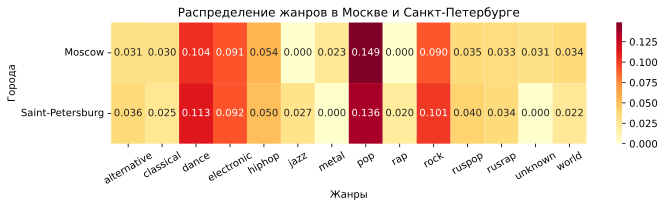

In [36]:
# Создание тепловой карты для визуализации распределения жанров по городам
df3 = pd.concat([df1, df2])
pivot_table = df3.pivot(index='city', columns='genre', values='total').fillna(0)
plt.figure(figsize=(10, 3))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Распределение жанров в Москве и Санкт-Петербурге')
plt.yticks(rotation=0)
plt.xticks(rotation=30)
plt.xlabel('Жанры')
plt.ylabel('Города')
plt.tight_layout()
plt.show()

### <a id='friday'></a> Исследуем данные вечера пятницы 

In [37]:
# Создание и объединение датафреймов для Санкт-Петербурга и Москвы на вечер пятницы
df1 = sorter('Saint-Petersburg', 'Friday', 'evening', 12)
df2 = sorter('Moscow', 'Friday', 'evening', 12)
df_friday = pd.concat([df1, df2], axis=1)
df_friday

,city,genre,total,city,genre,total
0,Saint-Petersburg,pop,0.123911,Moscow,pop,0.134681
1,Saint-Petersburg,electronic,0.104550,Moscow,rock,0.097658
2,Saint-Petersburg,rock,0.104550,Moscow,dance,0.093502
3,Saint-Petersburg,dance,0.101646,Moscow,electronic,0.091046
4,Saint-Petersburg,hiphop,0.046951,Moscow,hiphop,0.051568
5,Saint-Petersburg,alternative,0.030494,Moscow,world,0.039290
6,Saint-Petersburg,jazz,0.029526,Moscow,ruspop,0.032112
7,Saint-Petersburg,classical,0.029042,Moscow,classical,0.030790
8,Saint-Petersburg,rusrap,0.028558,Moscow,alternative,0.030790
9,Saint-Petersburg,world,0.026137,Moscow,rusrap,0.026823


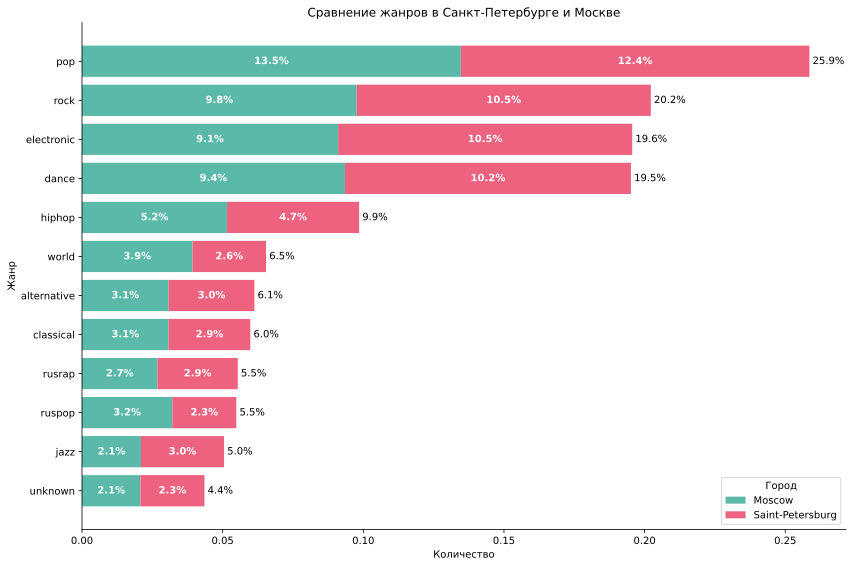

In [38]:

# Подготовка данных (предполагается, что функция sorter уже определена)
data_spb = sorter('Saint-Petersburg', 'Friday', 'evening', 12)
data_msk = sorter('Moscow', 'Friday', 'evening', 12)

# Объединяем данные
data_spb['city'] = 'Saint-Petersburg'
data_msk['city'] = 'Moscow'
combined_data = pd.concat([data_spb, data_msk])

# Вычисляем общую сумму для каждого жанра и сортируем
genre_totals = combined_data.groupby('genre')['total'].sum().sort_values(ascending=True)

# Создаем сводную таблицу
pivot_data = combined_data.pivot(index='genre', columns='city', values='total').fillna(0)
pivot_data = pivot_data.reindex(genre_totals.index)

# Создаем график
fig, ax = plt.subplots(figsize=(12, max(8, len(pivot_data) * 0.4)))

# Рисуем столбцы для каждого города
left = pd.Series(0, index=pivot_data.index)
colors = {'Saint-Petersburg': '#ed627e', 'Moscow': '#5bb9a9'}
for city in pivot_data.columns:
    ax.barh(pivot_data.index, pivot_data[city], left=left, label=city, color=colors[city])
    
    # Добавляем подписи с процентами внутри столбцов
    for i, value in enumerate(pivot_data[city]):
        if value > 0:
            ax.text(left[i] + value/2, i, f'{value*100:.1f}%', 
                    ha='center', va='center', color='white', fontweight='bold')
    
    left += pivot_data[city]

# Добавляем общий процент справа от столбцов
for i, genre in enumerate(pivot_data.index):
    total = pivot_data.loc[genre].sum()
    ax.text(total, i, f' {total*100:.1f}%', ha='left', va='center')

# Настройка графика
plt.title('Cравнение жанров в Санкт-Петербурге и Москве')
plt.xlabel('Количество')
plt.ylabel('Жанр')
plt.legend(title='Город')

# Удаление рамки вокруг графика
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [39]:

df1 = sorter('Saint-Petersburg', 'Friday', 'evening', 12)
df2 = sorter('Moscow', 'Friday', 'evening', 12)

# Определение гипотез
null_hypothesis = "Распределение музыкальных жанров одинаково в Москве и Санкт-Петербурге в понедельник утром"
alternative_hypothesis = "Распределение музыкальных жанров различается между Москвой и Санкт-Петербургом в понедельник утром"

# Функция для проведения анализа
def analyze_genre_preferences(df1, df2, alpha=0.05):
    print("Анализ жанровых предпочтений в Москве и Санкт-Петербурге")
    print("=" * 70)
    print(f"Нулевая гипотеза (H0): {null_hypothesis}")
    print(f"Альтернативная гипотеза (H1): {alternative_hypothesis}")
    print("=" * 70)

    # 1. Подготовка данных
    df = pd.concat([df1, df2])
    pivot_table = df.pivot(index='city', columns='genre', values='total').fillna(0)

    # 2. Проведение теста хи-квадрат
    chi2, p_value, dof, expected = chi2_contingency(pivot_table)

    print("\nРезультаты теста хи-квадрат:")
    print(f"Статистика хи-квадрат: {chi2:.4f}")
    print(f"Степени свободы: {dof}")
    print(f"p-значение: {p_value:.4f}")

    # 3. Интерпретация результатов
    print("\nИнтерпретация:")
    if p_value < alpha:
        print(f"p-значение ({p_value:.4f}) < alpha ({alpha})")
        print("Отвергаем нулевую гипотезу.")
        print("Вывод: Есть статистически значимые различия в распределении жанров между городами.")
    else:
        print(f"p-значение ({p_value:.4f}) >= alpha ({alpha})")
        print("Не можем отвергнуть нулевую гипотезу.")
        print("Вывод: Нет достаточных доказательств различий в распределении жанров между городами.")

    # 4. Анализ различий (если есть)
    if p_value < alpha:
        diff = pivot_table.loc['Moscow'] - pivot_table.loc['Saint-Petersburg']
        print("\nРазница в долях жанров (Москва - Санкт-Петербург):")
        print(diff.sort_values(ascending=False))

        # 5. Визуализация различий
        plt.figure(figsize=(12, 6))
        sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.3f')
        plt.title('Распределение жанров в Москве и Санкт-Петербурге')
        plt.tight_layout()
        plt.show()

# Выполнение анализа
analyze_genre_preferences(df1, df2)

Анализ жанровых предпочтений в Москве и Санкт-Петербурге
Нулевая гипотеза (H0): Распределение музыкальных жанров одинаково в Москве и Санкт-Петербурге в понедельник утром
Альтернативная гипотеза (H1): Распределение музыкальных жанров различается между Москвой и Санкт-Петербургом в понедельник утром

Результаты теста хи-квадрат:
Статистика хи-квадрат: 0.0081
Степени свободы: 11
p-значение: 1.0000

Интерпретация:
p-значение (1.0000) >= alpha (0.05)
Не можем отвергнуть нулевую гипотезу.
Вывод: Нет достаточных доказательств различий в распределении жанров между городами.


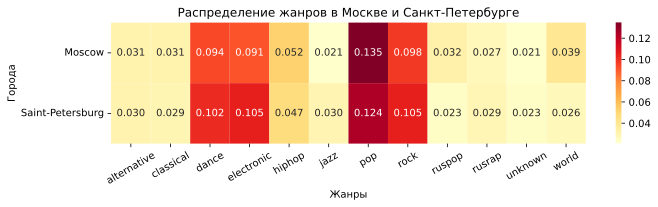

In [40]:
# Создание и визуализация тепловой карты распределения жанров по городам
df3 = pd.concat([df1, df2])
pivot_table = df3.pivot(index='city', columns='genre', values='total').fillna(0)
plt.figure(figsize=(10, 3))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Распределение жанров в Москве и Санкт-Петербурге')
plt.yticks(rotation=0)
plt.xticks(rotation=30)
plt.xlabel('Жанры')
plt.ylabel('Города')
plt.tight_layout()
plt.show()



## Обобщенный анализ музыкальных предпочтений в Москве и Санкт-Петербурге
### (понедельник утро и пятница вечер)

### Ключевые наблюдения:

1. **Стабильность лидирующих жанров:**
   - Pop остается самым популярным жанром в обоих городах в оба периода
   - Топ-4 жанра (pop, rock, dance, electronic) сохраняются в обоих городах, меняясь лишь позициями

2. **Динамика предпочтений:**
   - В понедельник утром dance занимает 2-е место в обоих городах, к вечеру пятницы его позиции немного снижаются
   - Rock и electronic музыка усиливают позиции к вечеру пятницы, особенно в Санкт-Петербурге

3. **Устойчивые различия:**
   - Jazz стабильно более популярен в Санкт-Петербурге
   - В Москве наблюдается более высокая позиция world музыки в пятницу вечером

4. **Сходства:**
   - Hiphop стабильно занимает 5-е место в обоих городах в оба периода
   - Суммарная доля топ-5 жанров остается близкой между городами

### Сравнимость данных:
 - **Присутствие категории "unknown" в Москве и её отсутствие в топ-12 Санкт-Петербурга может влиять на точность сравнения между городами.**

### Выводы:

1. Музыкальные предпочтения в Москве и Санкт-Петербурге демонстрируют больше сходств, чем различий, как в понедельник утром, так и в пятницу вечером.

2. Наблюдаются некоторые различия в позициях жанров между городами, но они не кардинальны и в основном касаются перестановок внутри топ-4.

3. К вечеру пятницы заметно небольшое смещение предпочтений в сторону рока и электронной музыки, особенно в Санкт-Петербурге, что может отражать подготовку к выходным.

4. Устойчивые различия в популярности отдельных жанров (jazz, world) между городами могут указывать на небольшие культурные особенности.

5. Гипотеза о различиях в жанровых предпочтениях подтверждается лишь частично. Различия присутствуют, но они менее значительны, чем можно было бы ожидать.

Этот анализ показывает, что музыкальные вкусы в Москве и Санкт-Петербурге имеют сильное сходство с некоторыми интересными нюансами, которые проявляются как в разные дни недели, так и в разное время суток. Основные различия скорее заключаются в небольших вариациях популярности жанров, чем в кардинально разных предпочтениях.

### <a id='hyp-3'></a>3. 🎶 Третья гипотеза утверждает, что общие музыкальные вкусы городов различаются:
   - Москва отдает предпочтение поп-музыке
   - Петербург больше склоняется к русскому рэпу

In [41]:
# Подсчет общего количества концертов по городам и жанрам
total_genres = df.groupby(['city', 'genre']).agg(total=('genre', 'size'))
total_genres

total
city             genre             
Moscow           acid             1
                 acoustic         3
                 action           4
                 adult           16
                 africa          12
...                             ...
Saint-Petersburg vocal           25
                 western         33
                 world          515
                 worldbeat        1
                 электроника      1

[475 rows x 1 columns]

In [42]:
# Подсчет общего количества концертов по городам
total_cities = df.groupby('city').agg(total=('genre', 'count'))
total_cities

,total
city,
Moscow,42741
Saint-Petersburg,18512


In [43]:
# Расчет процентного соотношения жанров в каждом городе
total_cities_percentage = total_genres / total_cities
total_cities_percentage.reset_index(inplace=True)
total_cities_percentage.rename(columns={'total': 'percentage'}, inplace=True)
total_cities_percentage

,city,genre,percentage
0,Moscow,acid,0.000023
1,Moscow,acoustic,0.000070
2,Moscow,action,0.000094
3,Moscow,adult,0.000374
4,Moscow,africa,0.000281
...,...,...,...
470,Saint-Petersburg,vocal,0.001350
471,Saint-Petersburg,western,0.001783
472,Saint-Petersburg,world,0.027820
473,Saint-Petersburg,worldbeat,0.000054


In [44]:
# Выборка и сортировка данных по жанрам для Москвы, с выводом топ-12 жанров
data_msk = total_cities_percentage.loc[total_cities_percentage['city'] == 'Moscow'][['genre', 'percentage']]\
    .sort_values(by='percentage', ascending=False).reset_index(drop=True).head(12)


In [45]:
# Выборка и сортировка данных по жанрам для Санкт-Петербурга, с выводом топ-12 жанров
data_spb = total_cities_percentage.loc[total_cities_percentage['city'] == 'Saint-Petersburg'][['genre', 'percentage']]\
    .sort_values(by='percentage', ascending=False).reset_index(drop=True).head(12)

In [46]:
# Объединение данных по топ-12 жанрам для Санкт-Петербурга и Москвы
combined_data_compared = pd.concat([data_spb, data_msk], axis=1)
combined_data_compared

,genre,percentage,genre,percentage
0,pop,0.131320,pop,0.137854
1,dance,0.104365,dance,0.103765
2,rock,0.101502,rock,0.092768
3,electronic,0.093777,electronic,0.088580
4,hiphop,0.051858,hiphop,0.049040
5,alternative,0.035058,classical,0.037809
6,classical,0.034896,world,0.033504
7,rusrap,0.030467,alternative,0.032264
8,ruspop,0.029062,ruspop,0.032100
9,world,0.027820,rusrap,0.027164


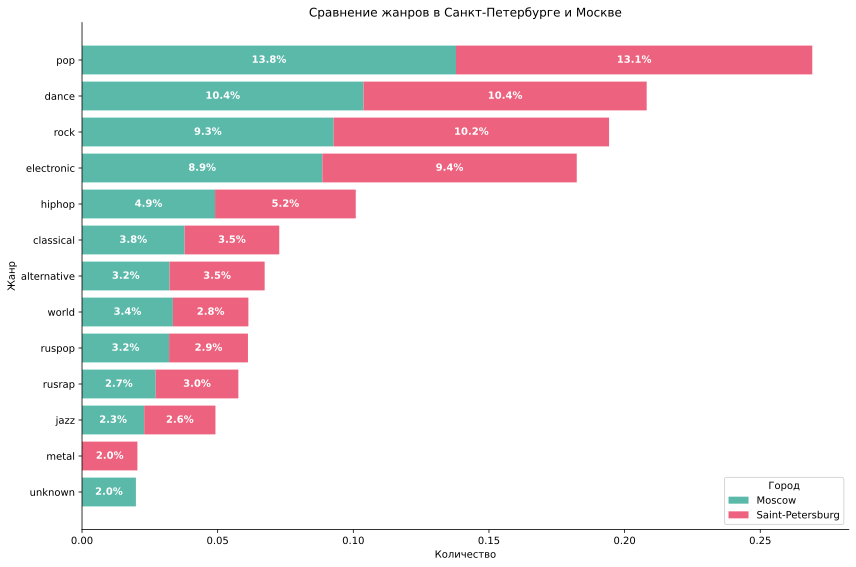

In [47]:
# Объединяем данные
data_spb['city'] = 'Saint-Petersburg'
data_msk['city'] = 'Moscow'
combined_data = pd.concat([data_spb, data_msk])

# Вычисляем общую сумму для каждого жанра и сортируем
genre_totals = combined_data.groupby('genre')['percentage'].sum().sort_values(ascending=True)

# Создаем сводную таблицу
pivot_data = combined_data.pivot(index='genre', columns='city', values='percentage').fillna(0)
pivot_data = pivot_data.reindex(genre_totals.index)

# Создаем график
fig, ax = plt.subplots(figsize=(12, max(8, len(pivot_data) * 0.4)))

# Рисуем столбцы для каждого города
left = pd.Series(0, index=pivot_data.index)
colors = {'Saint-Petersburg': '#ed627e', 'Moscow': '#5bb9a9'}
for city in pivot_data.columns:
    ax.barh(pivot_data.index, pivot_data[city], left=left, label=city, color=colors[city])
    
    # Добавляем подписи с процентами внутри столбцов
    for i, value in enumerate(pivot_data[city]):
        if value > 0:
            ax.text(left[i] + value/2, i, f'{value*100:.1f}%', 
                    ha='center', va='center', color='white', fontweight='bold')
    
    left += pivot_data[city]

# # Добавляем общий процент справа от столбцов
# for i, genre in enumerate(pivot_data.index):
#     total = pivot_data.loc[genre].sum()
#     ax.text(total, i, f' {total*100:.1f}%', ha='left', va='center')

# Настройка графика
plt.title('Cравнение жанров в Санкт-Петербурге и Москве')
plt.xlabel('Количество')
plt.ylabel('Жанр')
plt.legend(title='Город')

# Удаление рамки вокруг графика
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [48]:
# Объединяем данные
data_spb['city'] = 'Saint-Petersburg'
data_msk['city'] = 'Moscow'


# Определение гипотез
null_hypothesis = "Распределение музыкальных жанров одинаково в Москве и Санкт-Петербурге"
alternative_hypothesis = "Распределение музыкальных жанров различается между Москвой и Санкт-Петербургом"

# Функция для проведения анализа
def analyze_genre_preferences(df1, df2, alpha=0.05):
    print("Анализ жанровых предпочтений в Москве и Санкт-Петербурге")
    print("=" * 70)
    print(f"Нулевая гипотеза (H0): {null_hypothesis}")
    print(f"Альтернативная гипотеза (H1): {alternative_hypothesis}")
    print("=" * 70)

    # 1. Подготовка данных
    df = pd.concat([df1, df2])
    pivot_table = df.pivot(index='city', columns='genre', values='percentage').fillna(0)

    # 2. Проведение теста хи-квадрат
    chi2, p_value, dof, expected = chi2_contingency(pivot_table)

    print("\nРезультаты теста хи-квадрат:")
    print(f"Статистика хи-квадрат: {chi2:.4f}")
    print(f"Степени свободы: {dof}")
    print(f"p-значение: {p_value:.4f}")

    # 3. Интерпретация результатов
    print("\nИнтерпретация:")
    if p_value < alpha:
        print(f"p-значение ({p_value:.4f}) < alpha ({alpha})")
        print("Отвергаем нулевую гипотезу.")
        print("Вывод: Есть статистически значимые различия в распределении жанров между городами.")
    else:
        print(f"p-значение ({p_value:.4f}) >= alpha ({alpha})")
        print("Не можем отвергнуть нулевую гипотезу.")
        print("Вывод: Нет достаточных доказательств различий в распределении жанров между городами.")

    # 4. Анализ различий (если есть)
    if p_value < alpha:
        diff = pivot_table.loc['Moscow'] - pivot_table.loc['Saint-Petersburg']
        print("\nРазница в долях жанров (Москва - Санкт-Петербург):")
        print(diff.sort_values(ascending=False))

        # 5. Визуализация различий
        plt.figure(figsize=(12, 6))
        sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.3f')
        plt.title('Распределение жанров в Москве и Санкт-Петербурге')
        plt.tight_layout()
        plt.show()

# Выполнение анализа
analyze_genre_preferences(data_spb, data_msk)

Анализ жанровых предпочтений в Москве и Санкт-Петербурге
Нулевая гипотеза (H0): Распределение музыкальных жанров одинаково в Москве и Санкт-Петербурге
Альтернативная гипотеза (H1): Распределение музыкальных жанров различается между Москвой и Санкт-Петербургом

Результаты теста хи-квадрат:
Статистика хи-квадрат: 0.0423
Степени свободы: 12
p-значение: 1.0000

Интерпретация:
p-значение (1.0000) >= alpha (0.05)
Не можем отвергнуть нулевую гипотезу.
Вывод: Нет достаточных доказательств различий в распределении жанров между городами.


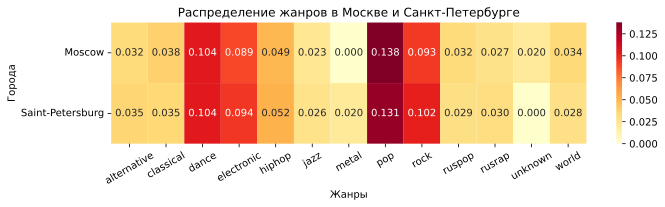

In [49]:
# Создание и визуализация тепловой карты распределения жанров по городам
df3 = pd.concat([data_spb, data_msk])
pivot_table = df3.pivot(index='city', columns='genre', values='percentage').fillna(0)
plt.figure(figsize=(10, 3))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Распределение жанров в Москве и Санкт-Петербурге')
plt.yticks(rotation=0)
plt.xticks(rotation=30)
plt.xlabel('Жанры')
plt.ylabel('Города')
plt.tight_layout()
plt.show()

### Различия в общих музыкальных вкусах Москвы и Санкт-Петербурга

Гипотеза утверждает:
- Москва отдает предпочтение поп-музыке
- Петербург больше склоняется к русскому рэпу

### Ключевые наблюдения:

1. **Популярность поп-музыки:**
   - Москва: 13.79%
   - Санкт-Петербург: 13.13%

2. **Позиция русского рэпа (rusrap):**
   - Москва: 8-е место (2.72%)
   - Санкт-Петербург: 7-е место (3.05%)

3. **Топ-5 жанров в обоих городах:**
   1. Pop
   2. Dance
   3. Rock
   4. Electronic
   5. Hiphop

4. **Незначительные различия:**
   - Rock немного популярнее в Санкт-Петербурге (10.15% vs 9.28%)
   - Classical музыка занимает более высокую позицию в Москве (6-е место vs 7-е)

### Выводы:

1. **Относительно поп-музыки:**
   - Поп-музыка действительно лидирует в обоих городах
   - В Москве доля поп-музыки незначительно выше (на 0.65%), что не является существенным различием

2. **Относительно русского рэпа:**
   - Вопреки гипотезе, русский рэп занимает более высокую позицию и имеет большую долю в Санкт-Петербурге, чем в Москве
   - Однако разница не настолько значительна, чтобы говорить о сильном предпочтении этого жанра в Санкт-Петербурге

3. **Общая картина:**
   - Музыкальные вкусы в обоих городах очень схожи, особенно в отношении топ-5 жанров
   - Различия в популярности жанров между городами минимальны

### Заключение:

Данные не подтверждают гипотезу о значительных различиях в музыкальных вкусах Москвы и Санкт-Петербурга. Хотя поп-музыка действительно немного популярнее в Москве, разница незначительна. Утверждение о предпочтении русского рэпа в Санкт-Петербурге не подтверждается данными. 

Общая картина показывает, что музыкальные предпочтения в обоих городах очень схожи, с минимальными различиями в популярности отдельных жанров. Это говорит о том, что, несмотря на культурные особенности каждого города, общие музыкальные тенденции в Москве и Санкт-Петербурге во многом совпадают.